In [1]:
import matplotlib
import warnings
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import visualize
import preprocessing

In [3]:
pattern = "./Past/input/*.csv"
past_df = preprocessing.load_all_csv(pattern)
print(past_df.shape)

['./Past/input/INvideos.csv', './Past/input/RUvideos.csv', './Past/input/USvideos.csv']
(119040, 16)


## Processing

In [4]:
preprocessing.fill_category(past_df)
preprocessing.cleanup_df(past_df)

## 1. Correlation

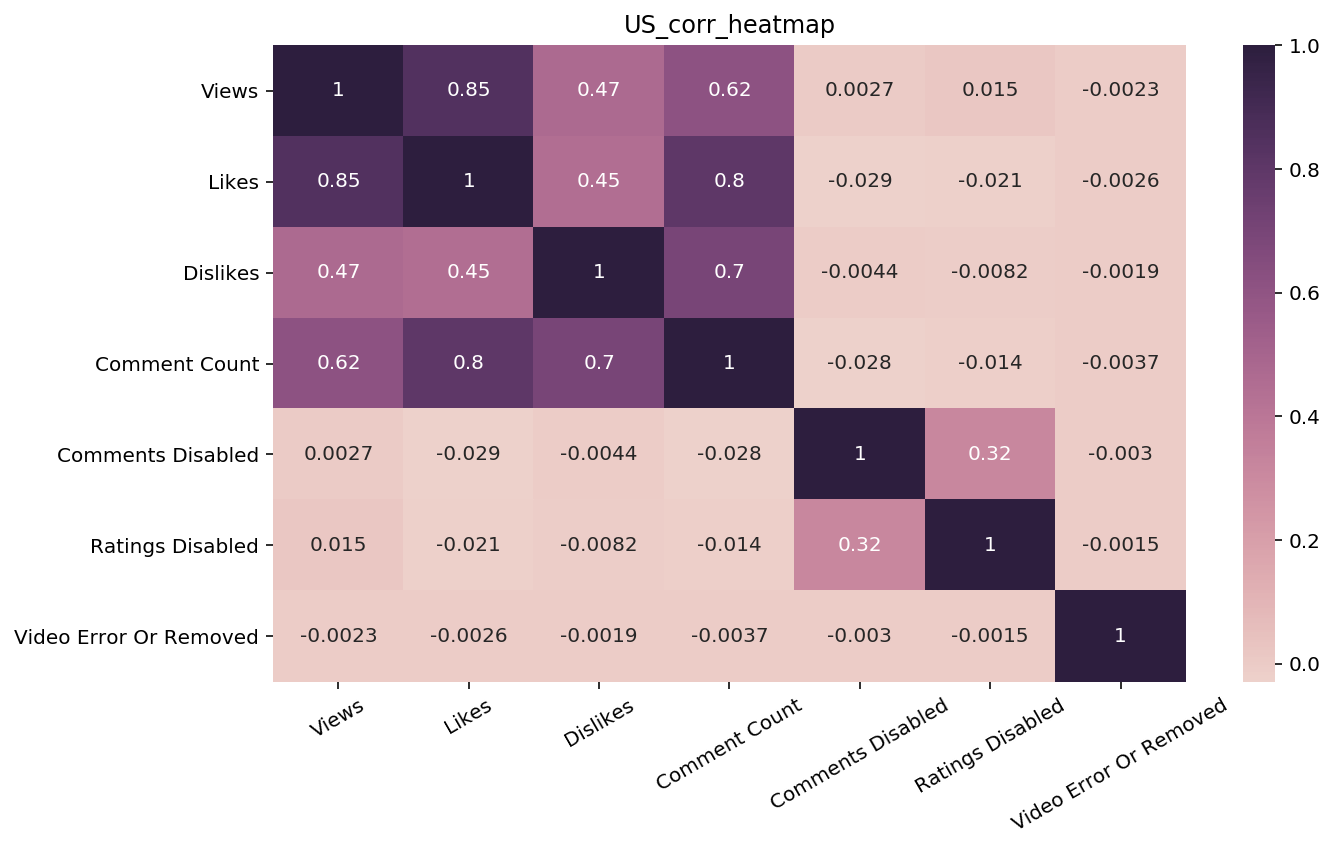

In [5]:
brief = ['category_id','views', 'likes', 'dislikes', 'comment_count']

visualize.plot_correlation(past_df, "US")

## 5. Like/Dislike ratio

In [8]:
combinations = [
    ("likes", "dislikes"),
    ("views", "comment_count"),
    ("dislikes", "views"),
    ("likes", "views")
]

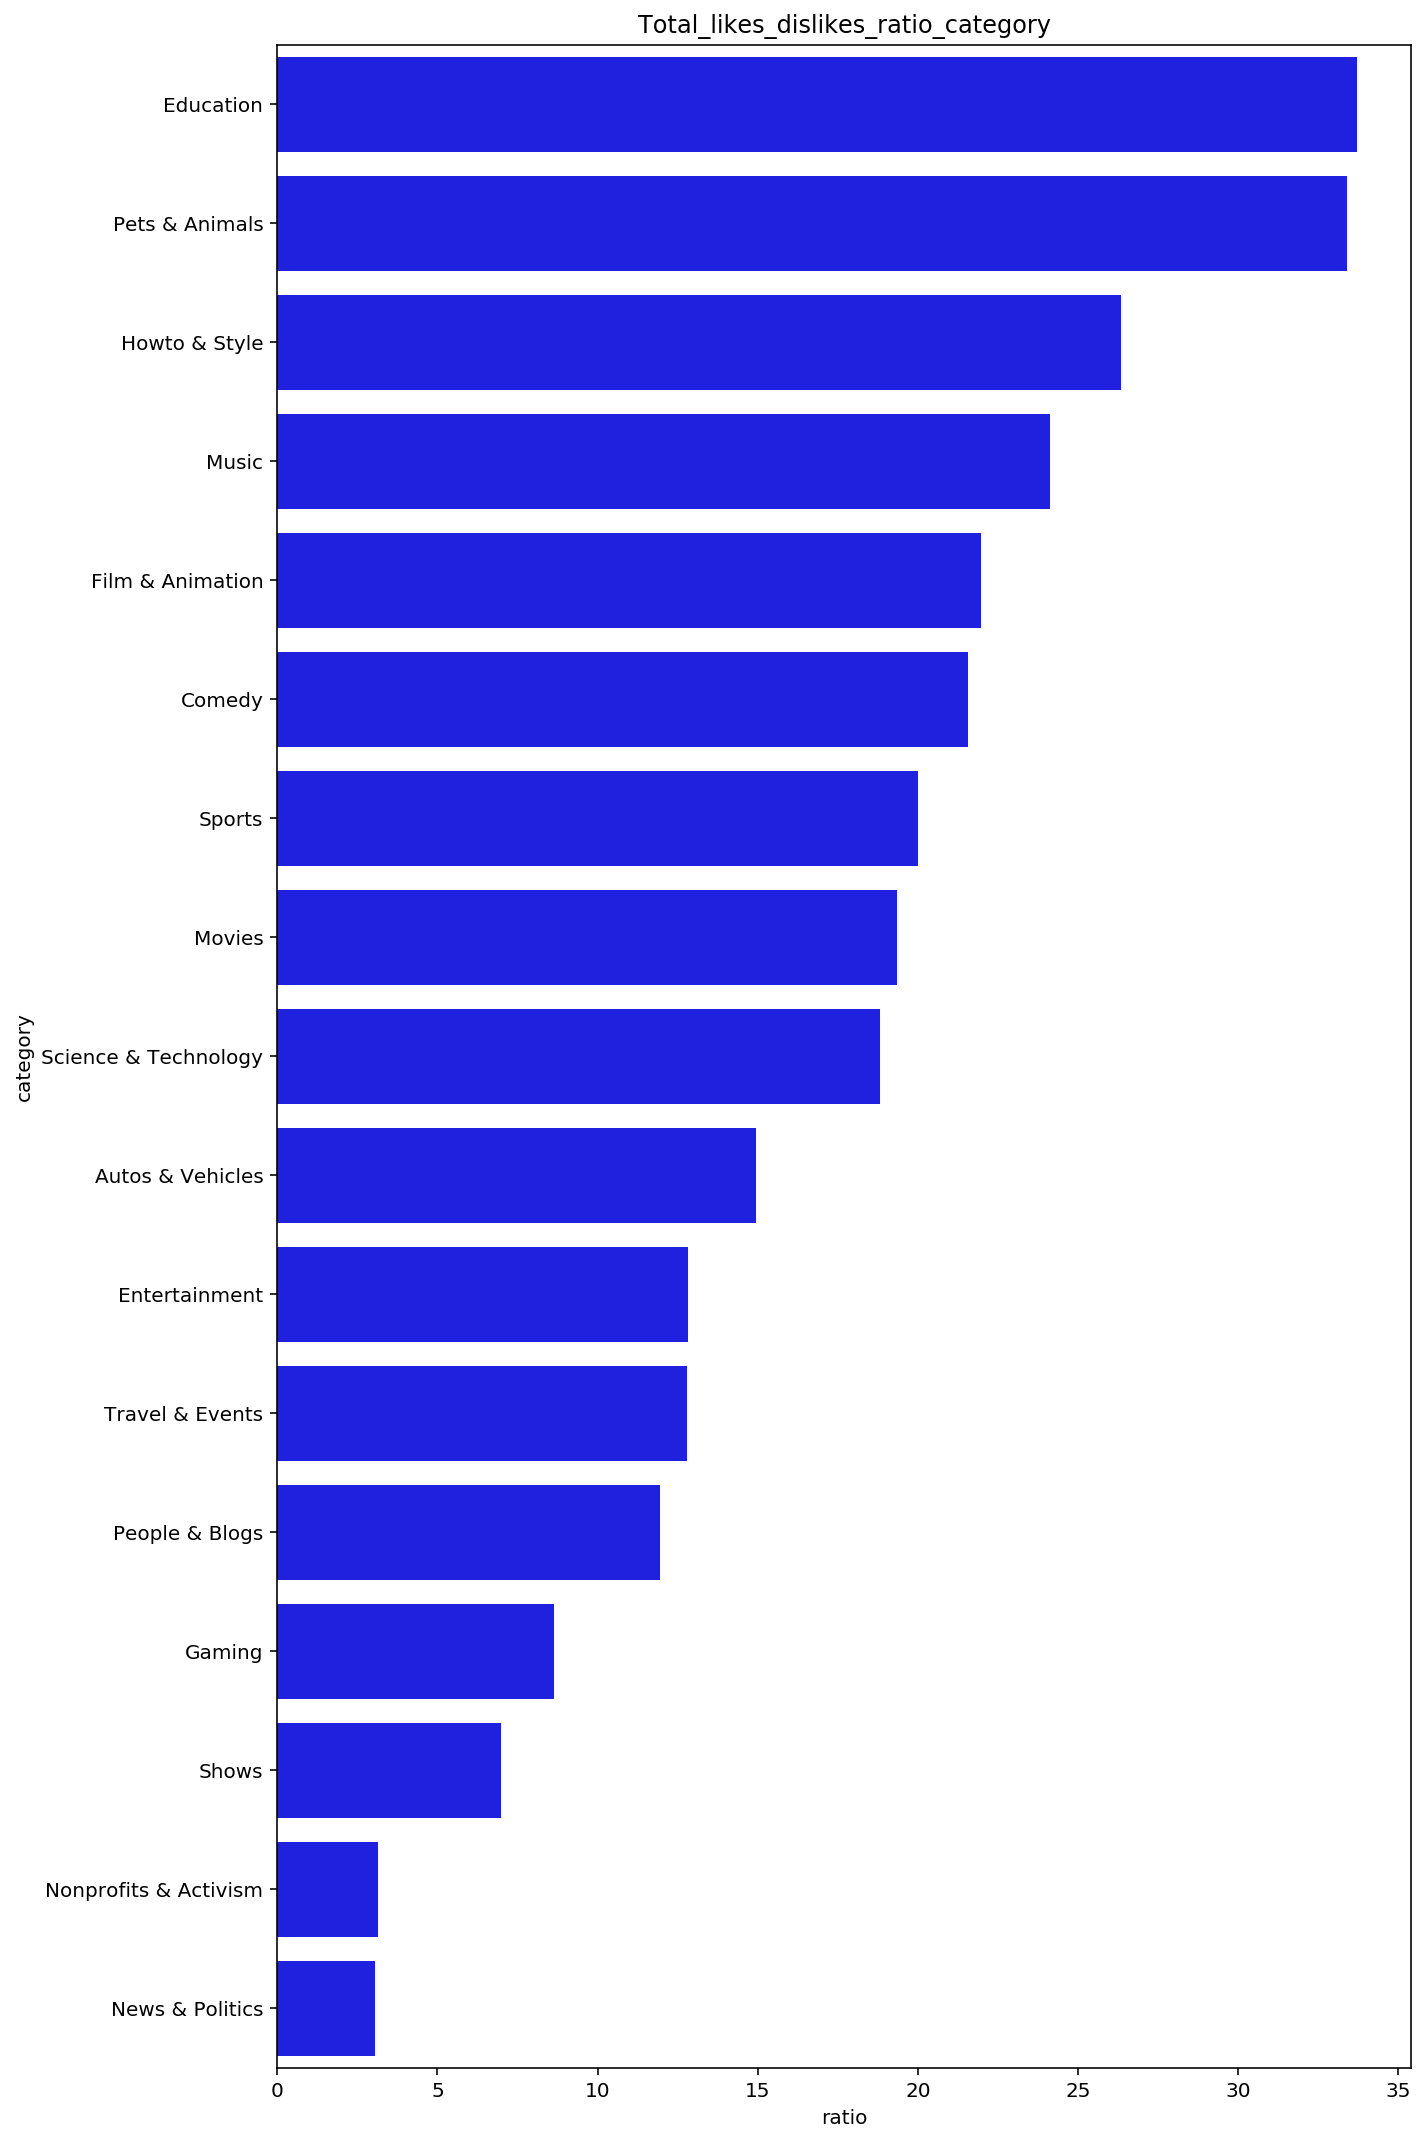

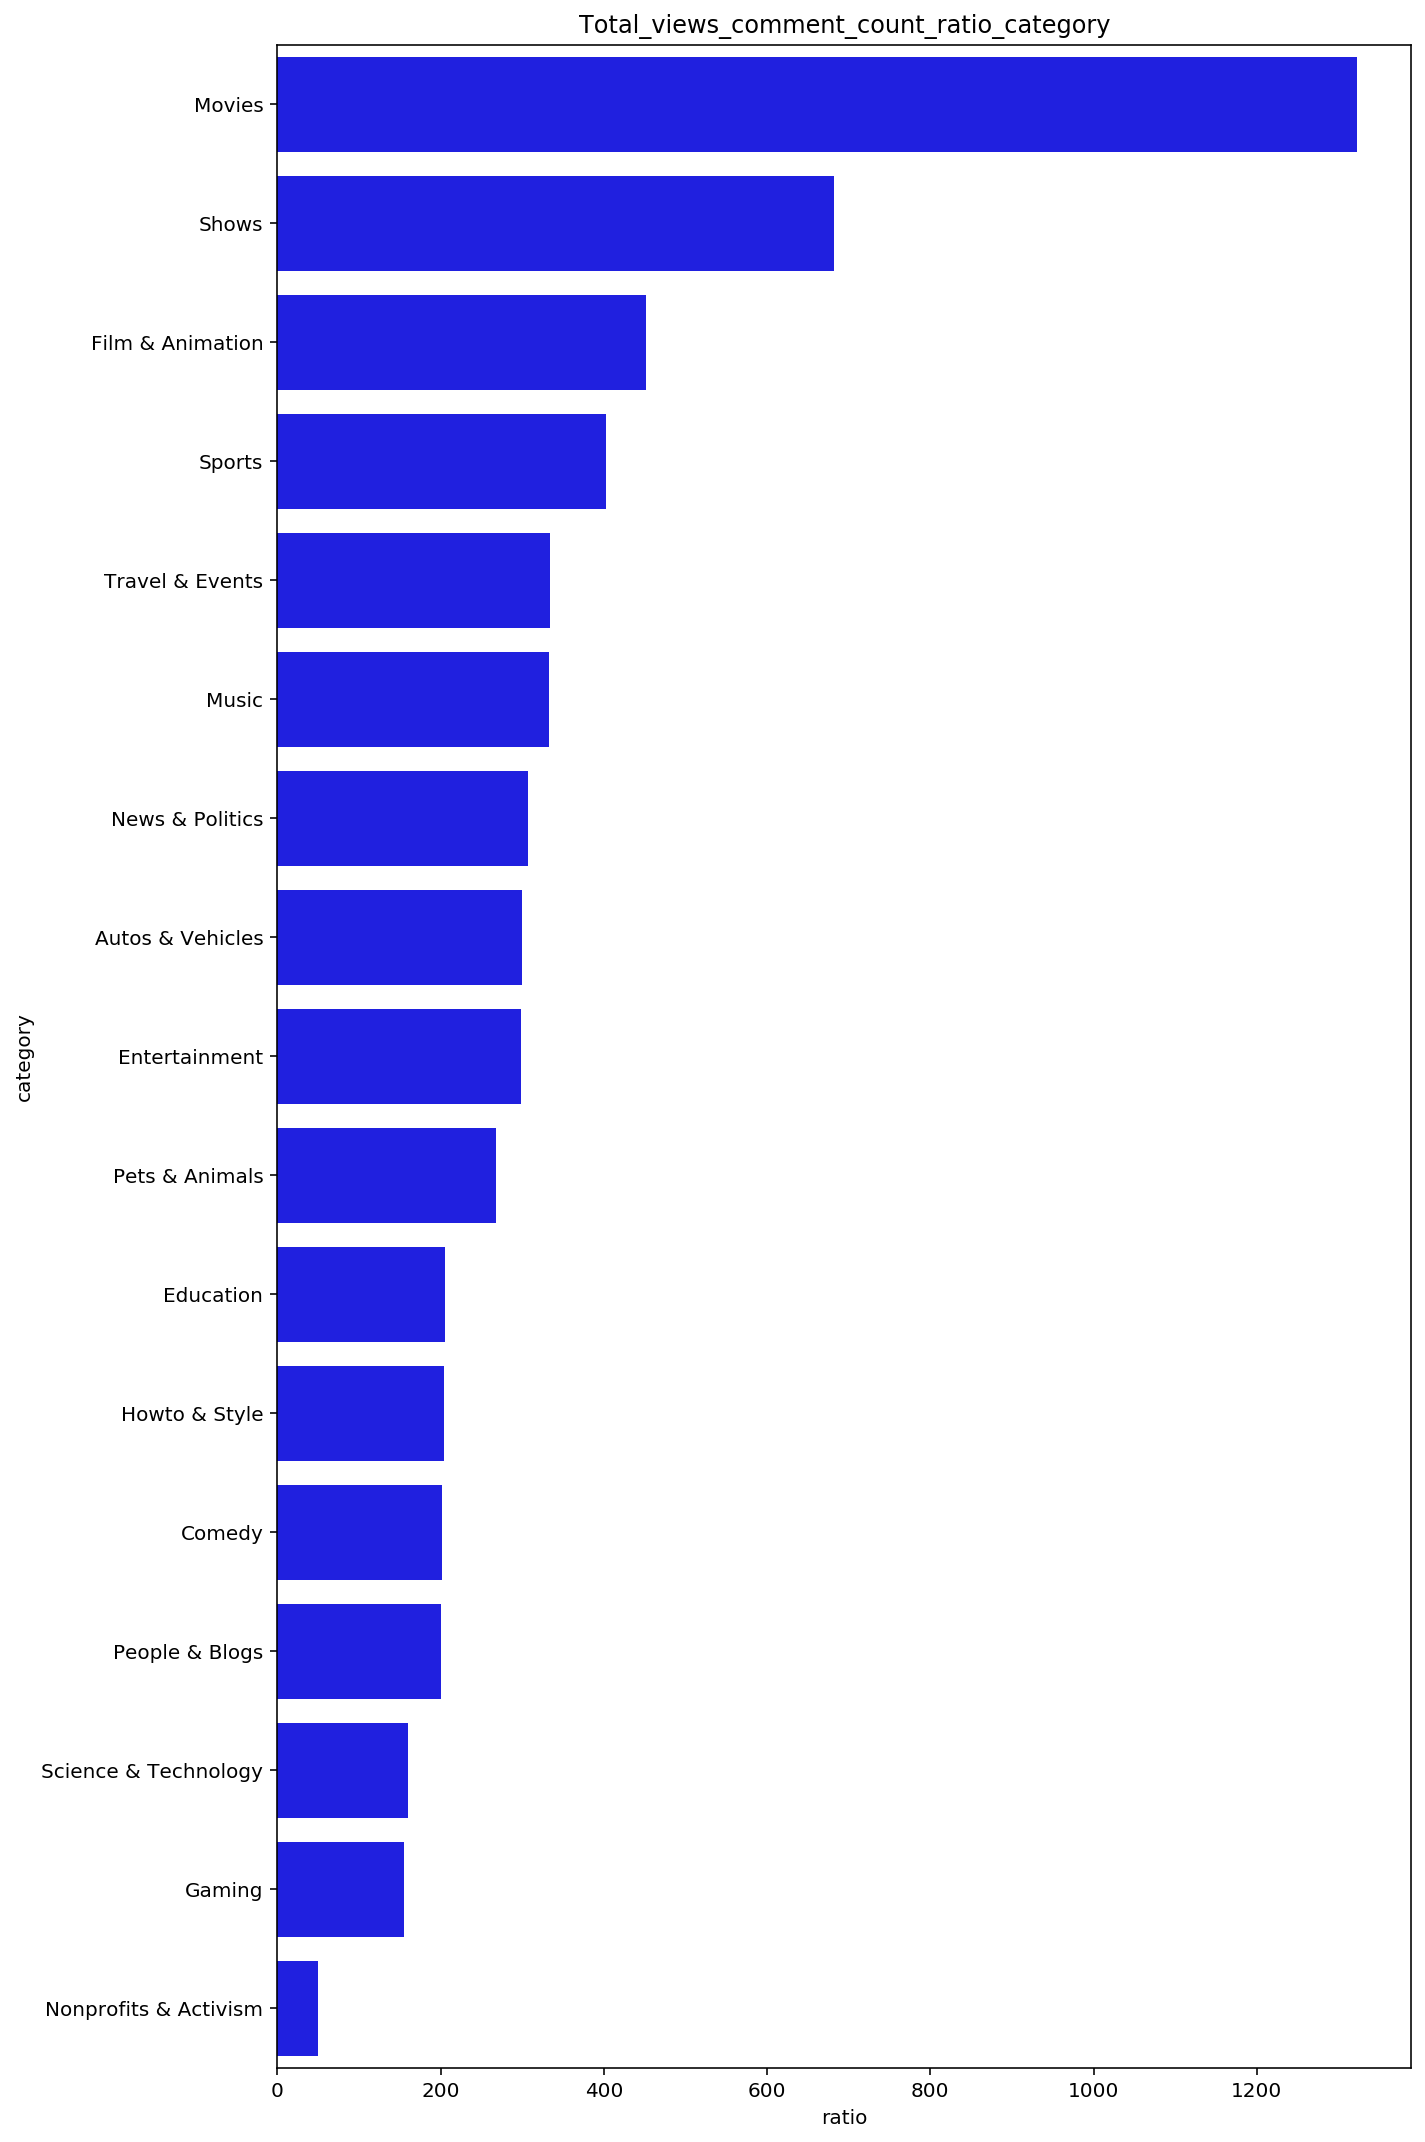

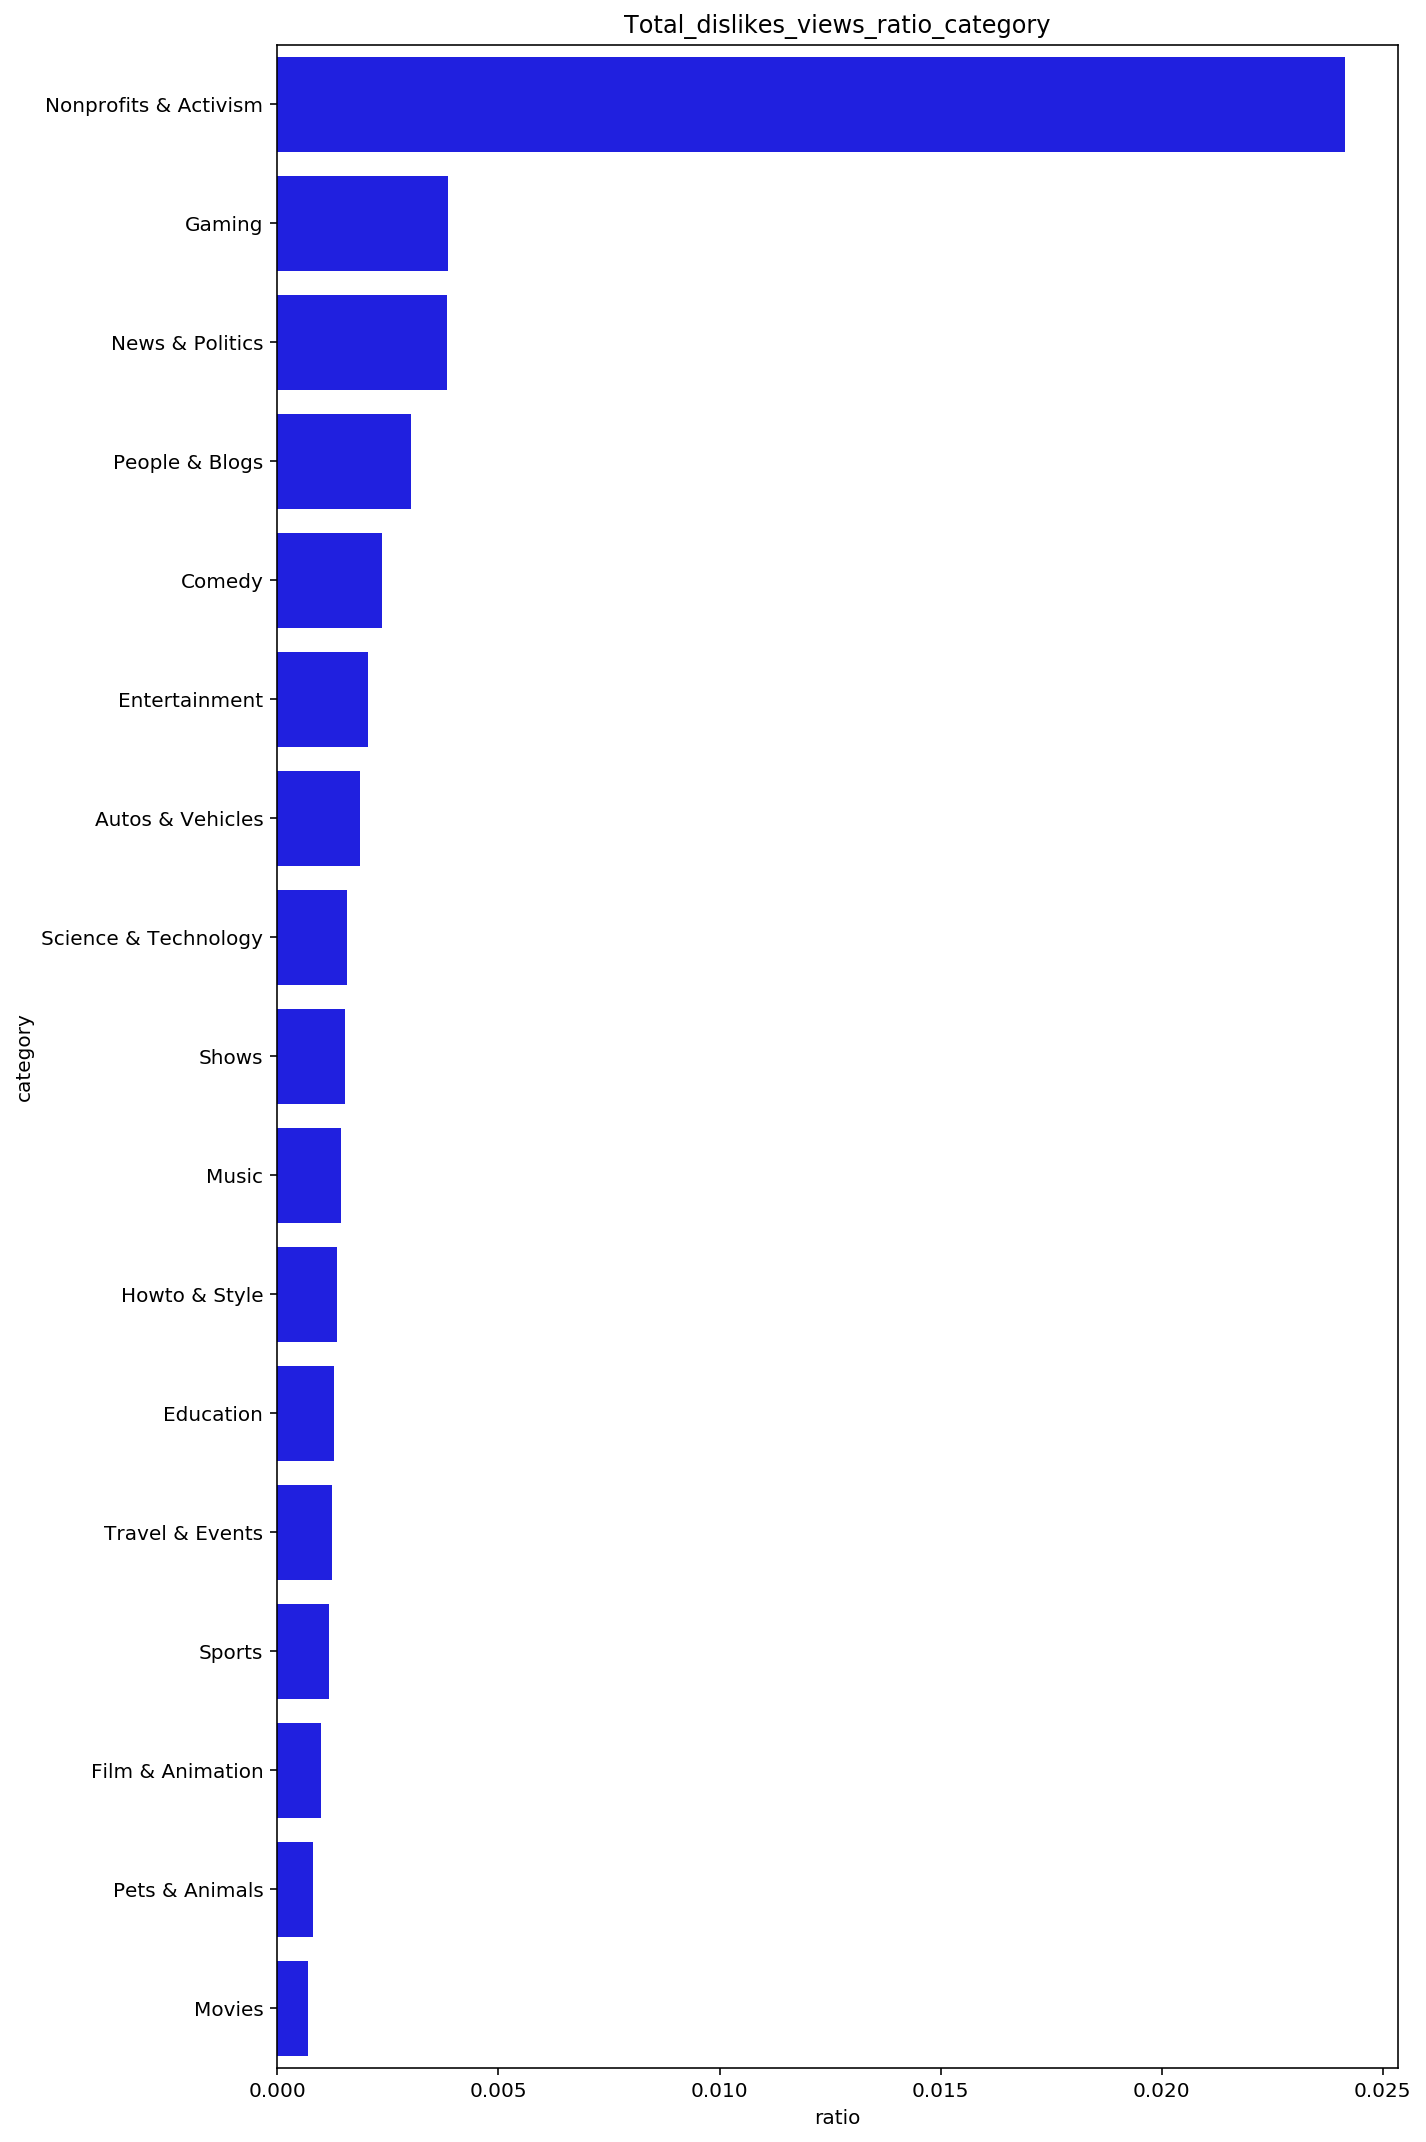

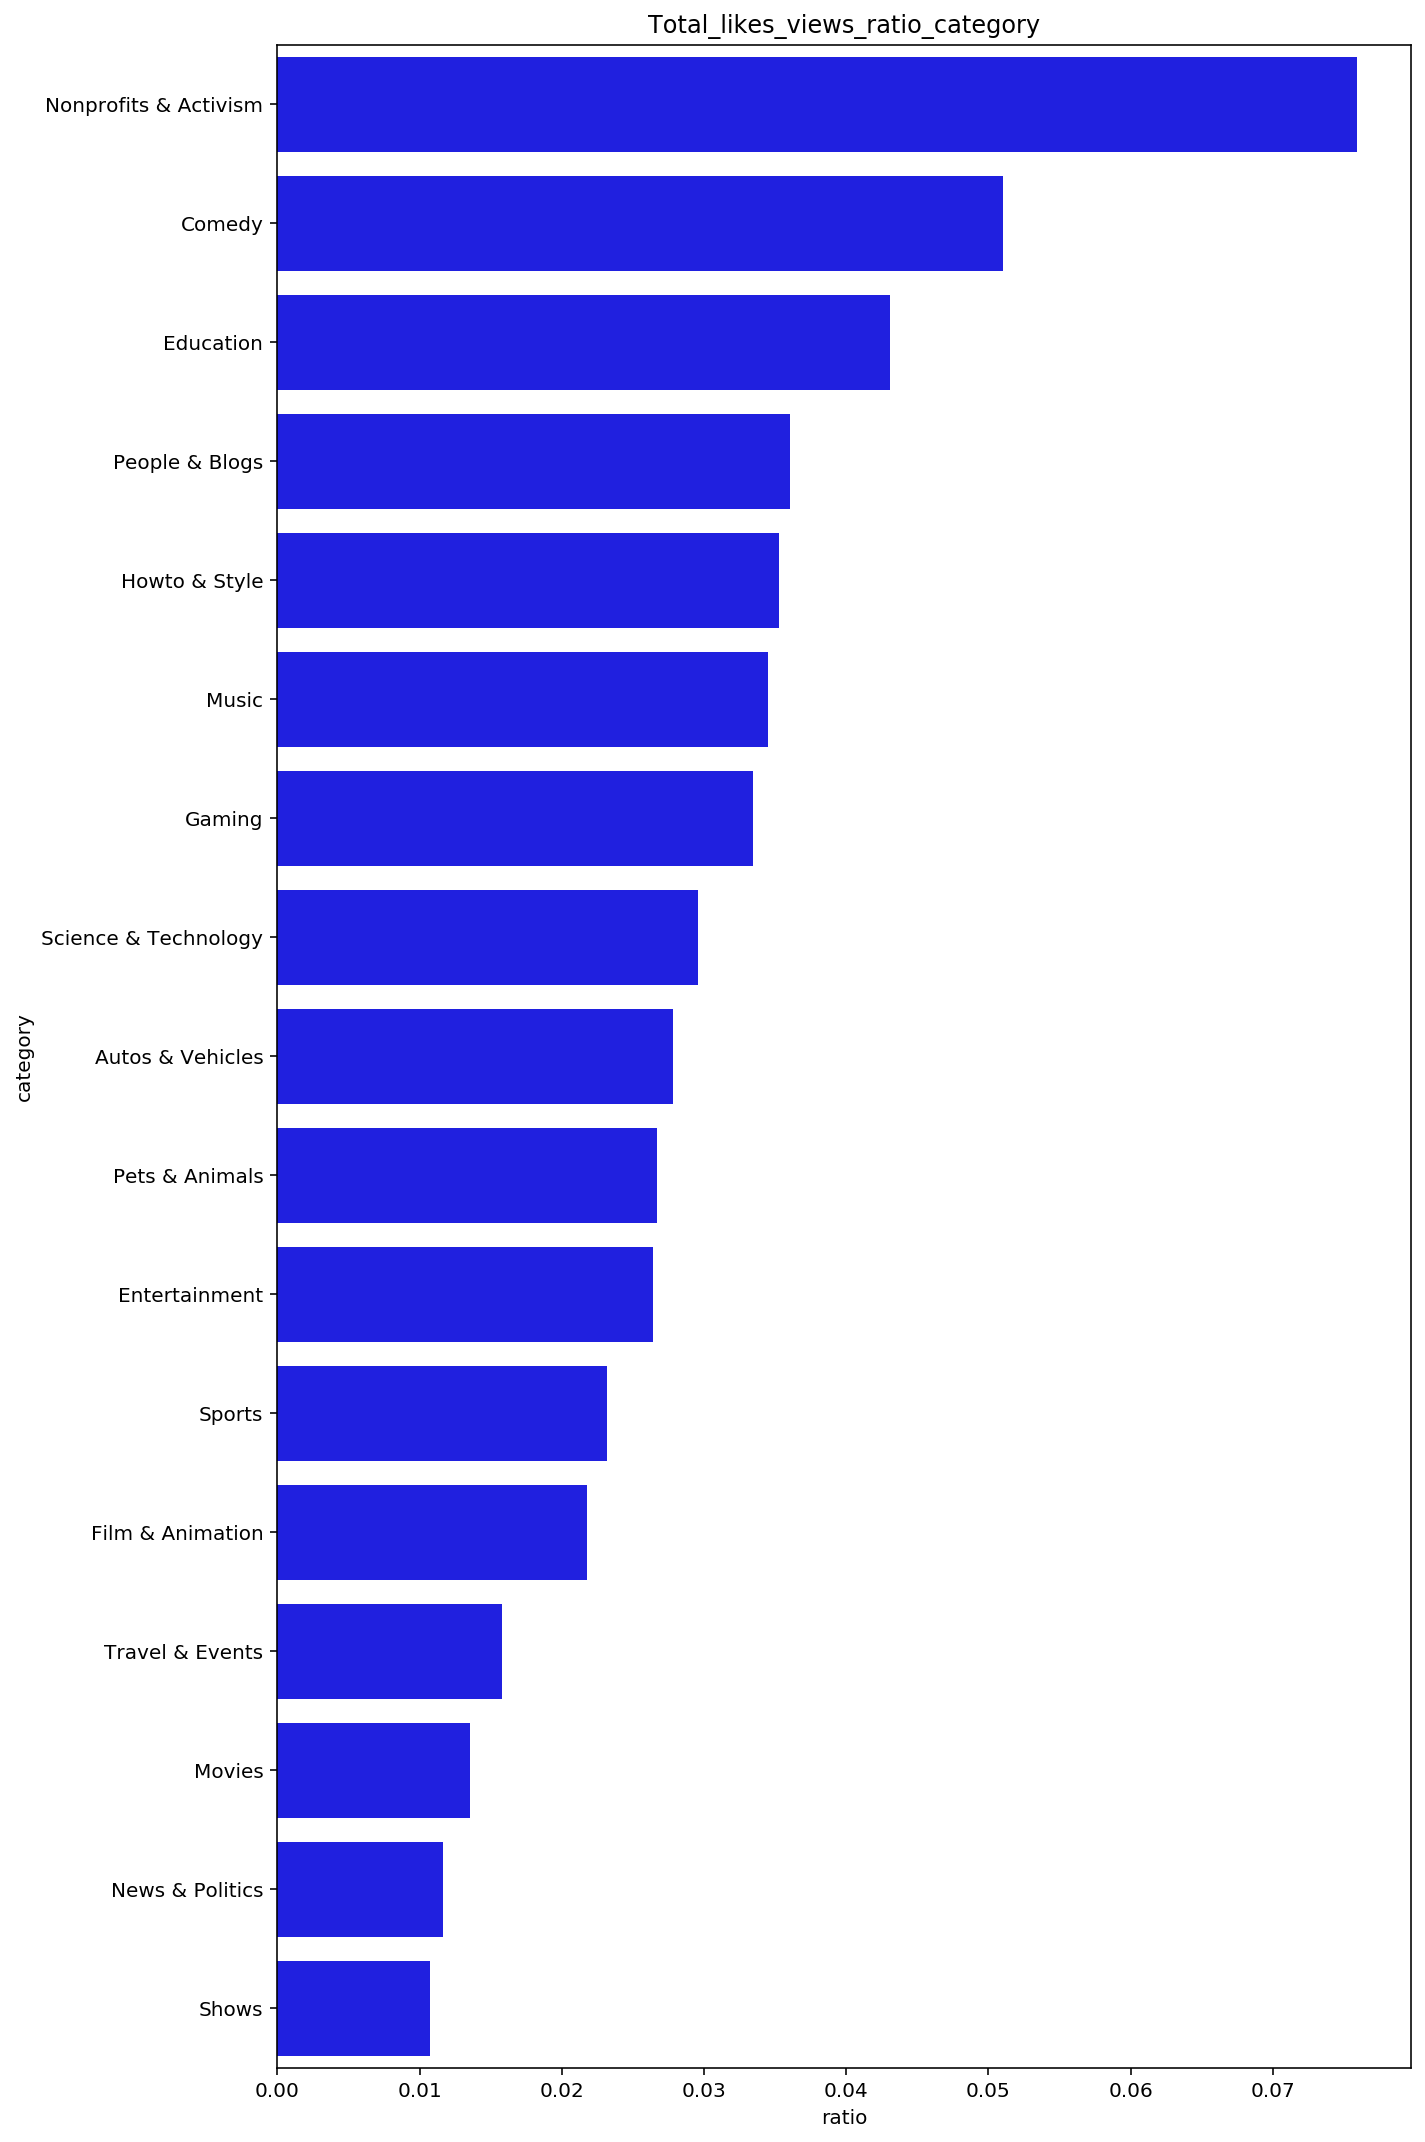

In [9]:
for a, b in combinations:
    visualize.plot_ratio(past_df, a, b, country="Total")

## (3) Publish time

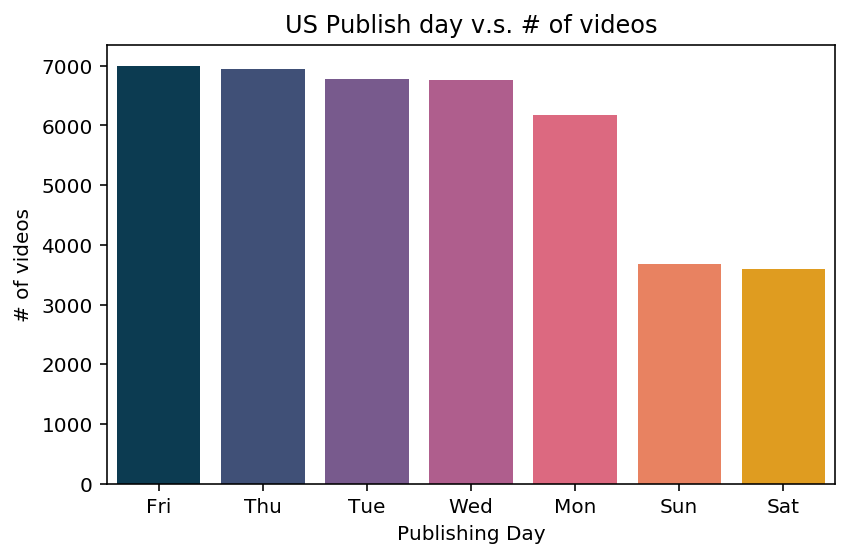

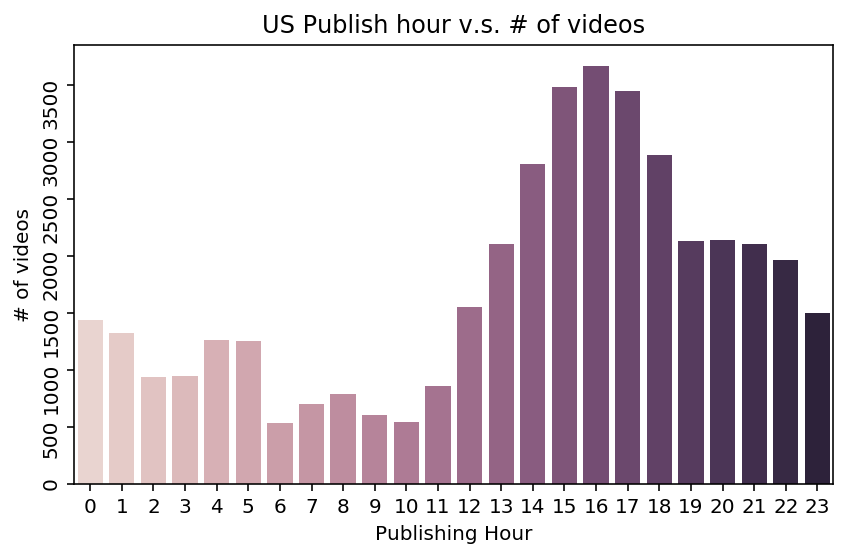

In [6]:
visualize.plot_publish_info(past_df, country="US")